Code verifies consistency after replicates

This notebook shwos with high liklihood there's a violator where fx is near/greater than 1, but falls well below the line in 180 replicates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob
import BootstrapFunctions as bsf
sns.set_context('talk')

In [2]:
folders = glob.glob('Data/Replicate_fx_above_line_viol/*/*')
paramlist = ['lambda','beta_x','gamma','beta_y','nx','Kx','ny','Ky','offset']
byfilelist = ['fileN','fileda','filedb','sysname']
dat = []
failedsims = []
bootstrapdicts = []
for i,folder in enumerate(folders):
    files = glob.glob(folder+'/*data.csv',recursive=True)
    for j,f in enumerate(files):
        data = pd.read_csv(f)
        data = data.reset_index().rename(columns={'index':'perturbation'})
        numstrings = f.split("_")[-2].split('n')
        data['fileN'] = float(numstrings[0])
        data['fileda'] = float(numstrings[1])
        data['filedb'] = float(numstrings[2])
        data['sysname'] = "/".join(f.split("/")[:-1])
        if (data[['Cov Bal xx','Cov Bal yy','Cov Bal xy']] > 0.05).any(axis=1).any():
            failedsims.append(f)
            continue
        dat.append(data)
        bsdict = bsf.pertexp_interpret(data,20000)
        bsdict['fileN'] = float(numstrings[0])
        bsdict['fileda'] = float(numstrings[1])
        bsdict['filedb'] = float(numstrings[2])
        bsdict['sysname'] = "/".join(f.split("/")[:-1])
        for p in paramlist:
            try:
                bsdict[p] = data[p][0]
            except KeyError:
                bsdict[p] = 0
        bootstrapdicts.append(bsdict)
analysed_data = pd.concat(dat)

analysed_data = analysed_data[(analysed_data["filedb"]>=0.005)&(analysed_data["fileda"]>=0.005)]

pertdata = analysed_data.set_index(["fileN",'fileda','filedb','sysname','perturbation'])
pertdata['offset'] = pertdata['offset'].fillna(0)
bootstrapped_res = pd.DataFrame(bootstrapdicts)
bootstrapped_res.set_index(["fileN",'fileda','filedb','sysname'],inplace=True)

In [3]:
intbootstrapped_res = pd.DataFrame(bootstrapdicts)
intbootstrapped_res.set_index(["fileN",'fileda','filedb','sysname'],inplace=True)

<Axes: >

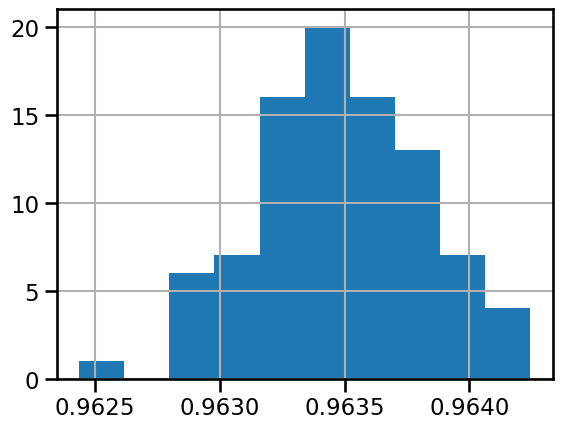

In [4]:
intbootstrapped_res['E[<F_x>]'].hist()

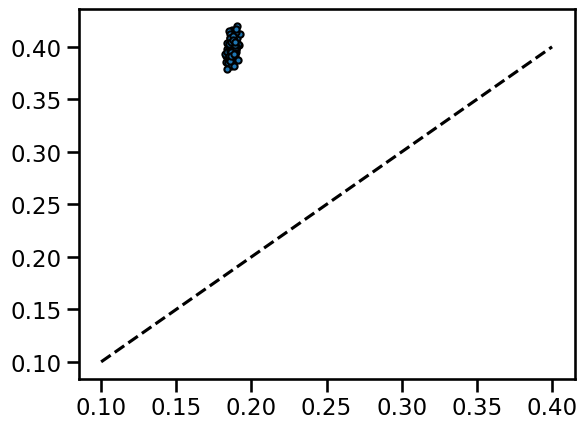

In [6]:
plt.scatter(1/intbootstrapped_res['E[CVx/CVy]'],intbootstrapped_res['E[rhoxy]'],s=20,edgecolors='k')
plt.plot(np.linspace(0.1,0.4),np.linspace(0.1,0.4),'k--')